In [1]:
# Imports !

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import patsy
import statsmodels.api as sm
from scipy.stats import ttest_ind

In [2]:
# Gather data into dataframes

traffic_main_df = pd.read_csv('traffic_counts_datasd.csv')
intersections_df = pd.read_csv('Intersections.csv')
caltrans_df = pd.read_csv('Caltrans.csv')

In [3]:
# Perform data cleaning on the dataframes

# Remove directional columns from traffic_counts
traffic_main_df.drop('id', 1, inplace=True)
traffic_main_df.drop('northbound_count', 1, inplace=True)
traffic_main_df.drop('southbound_count', 1, inplace=True)
traffic_main_df.drop('all_count', 1, inplace=True)
traffic_main_df.drop('eastbound_count', 1, inplace=True)
traffic_main_df.drop('westbound_count', 1, inplace=True)
traffic_main_df.drop('file_no', 1, inplace=True)
traffic_main_df.drop('count_date', 1, inplace=True)

#Drop any rows with NaN values in traffic_main counts
traffic_main_df.dropna(inplace=True) 

In [4]:
# Data cleaning on intersections data

intersections_df.drop('Document ID', 1, inplace=True)
intersections_df.drop('Remote ID', 1, inplace=True)
intersections_df.drop('Filename', 1, inplace=True)
intersections_df.drop('Received At', 1, inplace=True)
intersections_df.drop('Processed At', 1, inplace=True)

# Drop any rows with NaN values in traffic_main counts
intersections_df.dropna(inplace=True)

# Clean out new page headers (extracted from PDF)
intersections_df = intersections_df[intersections_df['1st Cross Street'] != '1st Cross Street']

# Clean the traffic count values (get rid of tail symbols e.g. 'N', 'S', etc.)
for index, row in intersections_df.iterrows():
    row['2009'] = row['2009'].split()[0]
    row['2010'] = row['2010'].split()[0]
    row['2011'] = row['2011'].split()[0]
    row['2012'] = row['2012'].split()[0]
    row['2013'] = row['2013'].split()[0]

# Taking the average traffic of all the years (2009 - 2013) and storing it in a column called "Average AADT"
intersections_df['Average AADT'] = 0
for i, row in intersections_df.iterrows():
    avg = int((int(row['2009']) + int(row['2010']) + int(row['2011']) 
                                                    + int(row['2012']) + int(row['2013']))) / 5
    intersections_df.set_value(i, 'Average AADT', avg) 

In [5]:
# Data cleaning on caltrans dataframe

caltrans_df.drop('Caltrans District ID Number', 1, inplace=True)
caltrans_df.drop('Route Suffix', 1, inplace=True)
caltrans_df.drop('Postmile Prefix', 1, inplace=True)
caltrans_df.drop('Postmile Number', 1, inplace=True)
caltrans_df.drop('Postmile Suffix', 1, inplace=True)
caltrans_df.drop('South or Westbound Peak Hour', 1, inplace=True)
caltrans_df.drop('South or Westbound Peak Month', 1, inplace=True)
caltrans_df.drop('North or Eastbound Peak Hour', 1, inplace=True)
caltrans_df.drop('North or Eastbound Peak Month', 1, inplace=True)


In [6]:
# Retrieve only San Diego county data
caltrans_df = caltrans_df[caltrans_df['County'] == "San Diego"]

# fill all NaN traffic values (directional) with 0's for average computation
caltrans_df['South or Westbound Annual Average Daily Traffic (AADT)'].fillna(0, inplace=True)
caltrans_df['North or Eastbound Annual Average Daily Traffic (AADT)'].fillna(0, inplace=True)

# append a new column with consolidated directional traffic counts (S/W + N/E)
caltrans_df['Total Average Daily Traffic (TADT)'] = (
    caltrans_df['South or Westbound Annual Average Daily Traffic (AADT)'] +
    caltrans_df['North or Eastbound Annual Average Daily Traffic (AADT)'])

In [7]:
# Create a dictionary of street-range locations to total_count
main_dict = dict()
main_counts = dict() # keeps track of # of keys found

for i, row in traffic_main_df.iterrows():
    keytp = (row['street_name'], row['limits'])
    # If key already exists in the dictionary, append to count and take sum of traffic values
    if keytp in main_dict:
        main_counts[keytp] = main_counts[keytp] + 1
        main_dict[keytp] = (main_dict[keytp] + row['total_count'])
    # Otherwise, initialize key to traffic value and count to 1
    else:
        main_counts[keytp] = 1
        main_dict[keytp] = row['total_count']

# Computing final average of all traffic values
for key in main_dict:
    main_dict[key] = main_dict[key] / main_counts[key]

In [14]:
# Creating dictionary for intersection pairs
inter_dict = dict()

for i, row in intersections_df.iterrows():
    key = (row['Primary Street'], row['1st Cross Street'])
    # Initialize key to intersection value 
    inter_dict[key] = row['Average AADT']

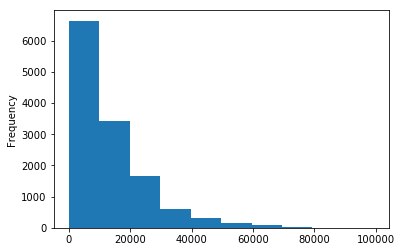

In [28]:
# Data Visualization
from pandas.tools.plotting import scatter_matrix

traffic_main_df['total_count'].plot.hist()


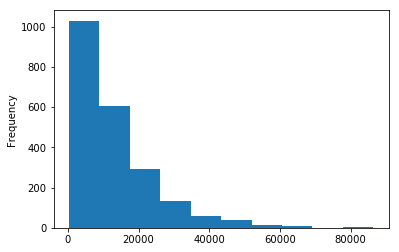

In [27]:
intersections_df['Average AADT'].plot.hist()


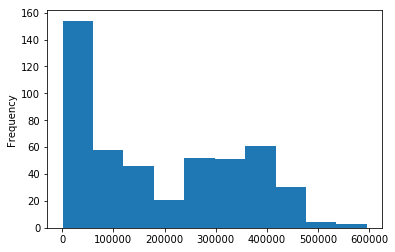

In [26]:
caltrans_df['Total Average Daily Traffic (TADT)'].plot.hist()